Analyzing Portland's voterfile to distinguish between white conservatives, white moderate, and POC. 

To identify these voters, we mainly used the columns: Cacuasian, Ideo22, and VCI22, which are all scores from the Catalist model. The Caucasian column signifies the probability that the voter is Caucasian from 0 to 100. The Ideo22 column represents the voters ideology from 0 (more conservative) to 100 (more progressive). The score is a relative ranking, not a probability so it is designed to identify voters who have higher tendencies to to support progressive positions on issues. We use the VCI22 column in conjunction with the Ideo22 column to narrow down on white progressive voters. VCI22 represents Vote Choice Index (VCI) for 2022. This score is a probability and signifies the likelihood that the voter will support a Democratic candidate over a Republican candidate in a competitive election. The scores range from 0 (0% likely to support a Democrat Candidate) to 100 (100% likely to support a Democrat Candidate). 

Using these columns, we identify white progressives as the below:
- greater than or equal to 70 Caucasian
- greater than or equal to 30 Ideo22
- greater than or equal to 50 VCI22

We then identify white moderates as:
- greater than equal to 70 Cacuasian

Lastly, we identify persons of color (POC) as:
- anyone without a label after the above filters

After labeling, this notebook creates scatterplots of Ideo22 vs VCI22 for each demographic and Zone. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 


In [ ]:
 
file_path = 'voterfile_zones.csv'
column_names = [
    'Voter File VANID', 'DWID', 'Sex', 'Address', 'City', 'State', 'Zip5', 'Zip4', 'AddressID',
    'Latitude', 'Longitude', 'PrecinctName', 'Age', 'Inc', 'Ideo22', 'VCI22', '2022:VProp', 'VoteProp24',
    'Asian', 'Black', 'Caucasian', 'Hispanic', 'NatAmer', 'General23', 'General22', 'General21', 'General20',
    'General19', 'General18', 'General17', 'General16', 'General15', 'General14', 'General13', 'General12',
    'General11', 'General10', 'General09', 'General08', 'General06', 'General05', 'General04', 'General02',
    'General00', 'MayMunicipal17', 'NovemberSpecial07', 'PresPrimary12', 'PresPrimary12Party', 'PresPrimary08',
    'PresPrimary08Party', 'PresPrimary(av)20', 'PresPrimary(av)16', 'Primary23', 'Primary23Party', 'Primary22',
    'Primary22Party', 'Primary21', 'Primary21Party', 'Primary19', 'Primary19Party', 'Primary18', 'Primary18Party',
    'Primary17', 'Primary17Party', 'Primary15', 'Primary15Party', 'Primary14', 'Primary14Party', 'Primary13',
    'Primary13Party', 'Primary12', 'Primary12Party', 'Primary11', 'Primary11Party', 'Primary10', 'Primary10Party',
    'Primary09', 'Primary09Party', 'Primary08', 'Primary08Party', 'Primary06', 'Primary04', 'Primary02', 'Primary00',
    'Primary(av)20', 'Primary(av)16', 'Special23', 'Special22', 'Special21', 'Special20', 'Special19', 'Special18',
    'Special17', 'Special16', 'Special15', 'Special14', 'Special13', 'Special12', 'Special11', 'Special10',
    'Special09', 'Special08', 'Special07', 'Special06', 'Special05', 'Special04', 'Special03', 'Special02',
    'Special01', 'Special00', 'points', 'GEOID20', 'zone'
]
vf_df = pd.read_csv(file_path, names=column_names, header=0)
print(vf_df)

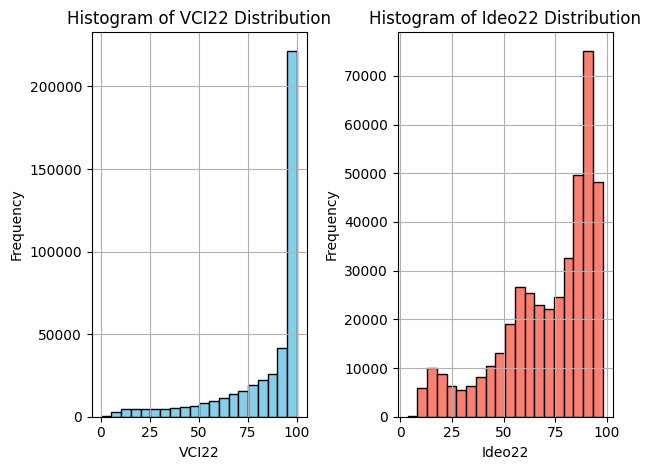

In [37]:
# Create a side-by side histogram of VCI22 and IDEO22 columns
# VCI22
plt.subplot(1, 2, 1)
plt.hist(vf_df['VCI22'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('VCI22')
plt.ylabel('Frequency')
plt.title('Histogram of VCI22 Distribution')
plt.grid(True)

# Ideo22
plt.subplot(1, 2, 2)
plt.hist(vf_df['Ideo22'], bins=20, color='salmon', edgecolor='black')
plt.xlabel('Ideo22')
plt.ylabel('Frequency')
plt.title('Histogram of Ideo22 Distribution')
plt.grid(True)

plt.tight_layout()
plt.show()

In [53]:
# Create empty column to label
vf_df['Demo_Labels'] = ''

In [64]:
# label white progressives
WP = (vf_df['Caucasian'] >= 70) & (vf_df['Ideo22'] >= 30) & (vf_df['VCI22'] >= 50)
vf_df.loc[WP, 'Demo_Labels'] = 'WP'

#label white moderates
WM = (vf_df['Caucasian'] >= 70) & (vf_df['Demo_Labels'] == '')
vf_df.loc[WM, 'Demo_Labels'] = 'WM'

# label any leftover people as POC
vf_df.loc[vf_df['Demo_Labels'] == '', 'Demo_Labels'] = 'POC'


WP     285778
POC    112274
WM      47706
Name: Demo_Labels, dtype: int64


WP     205955
WM     127529
POC    112274
Name: Demo_Labels, dtype: int64


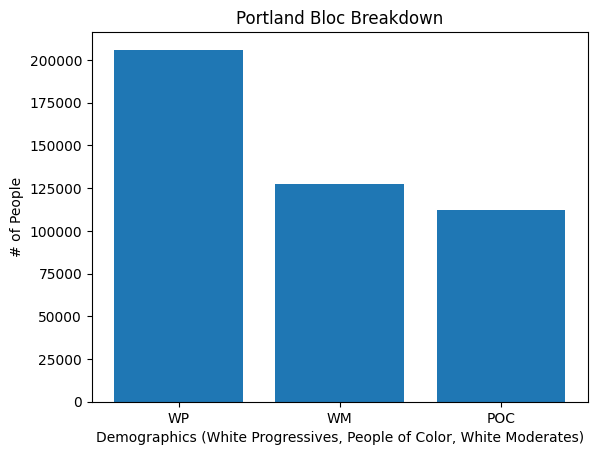

In [57]:
white_counts = vf_df['Demo_Labels'].value_counts()
print(white_counts)
# Plotting the count of different values
plt.bar(white_counts.index, white_counts.values)
plt.xlabel('Demographics (White Progressives, People of Color, White Moderates)')
plt.ylabel('# of People')
plt.title('Portland Bloc Breakdown')
plt.show()

In [ ]:
plt.scatter(vf_df['Ideo22'], vf_df['VCI22'], c=vf_df['Demo_Labels'], s=0.001)
plt.xlabel('Ideology')
plt.ylabel('Vote Choice Index (VCI)')
plt.title('Ideology vs Vote Choice Index in Portland')
plt.show()

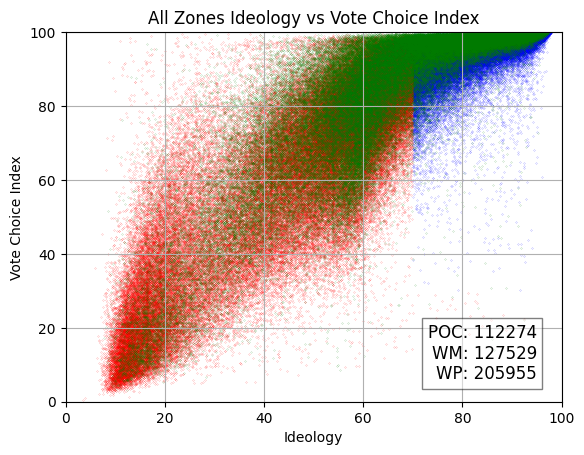

In [58]:
# City Wide scatter plot (Ideo22 vs VCI22) for each demographic (POC, WP, WC)
category_colors = {'WP': 'blue', 'WM': 'red', 'POC': 'green'}
total_rows = len(vf_df)
poc_percentage = len(vf_df[vf_df['Demo_Labels'] == 'POC']) / total_rows * 100
poc_city = len(vf_df[vf_df['Demo_Labels'] == 'POC'])

wm_percentage = len(vf_df[vf_df['Demo_Labels'] == 'WM']) / total_rows * 100
wm_city = len(vf_df[vf_df['Demo_Labels'] == 'WM'])

wp_percentage = len(vf_df[vf_df['Demo_Labels'] == 'WP']) / total_rows * 100
wp_city = len(vf_df[vf_df['Demo_Labels'] == 'WP'])

vals_city = {'POC': poc_city, 'WP': wp_city, 'WM': wm_city }
text = f"POC: {poc_city}\nWM: {wm_city}\nWP: {wp_city}"
for category, color in category_colors.items():
    plt.scatter(vf_df[vf_df['Demo_Labels'] == category]['Ideo22'],
                vf_df[vf_df['Demo_Labels'] == category]['VCI22'],
                color=color,
                label=category,
                s=0.01)

plt.xlabel('Ideology')
plt.ylabel('Vote Choice Index')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('All Zones Ideology vs Vote Choice Index')
plt.text(0.95, 0.05, text, fontsize=12, ha='right', va='bottom',transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True)
plt.show()

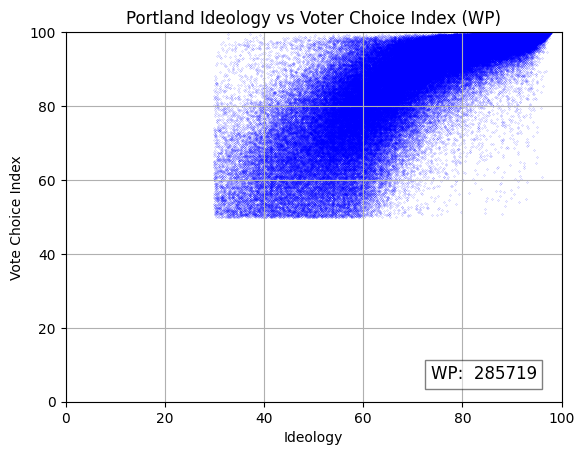

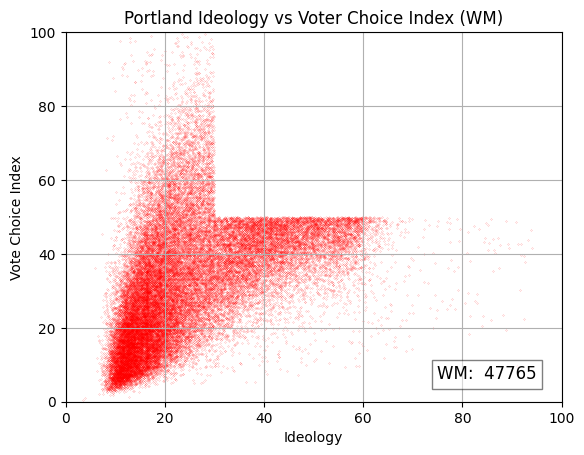

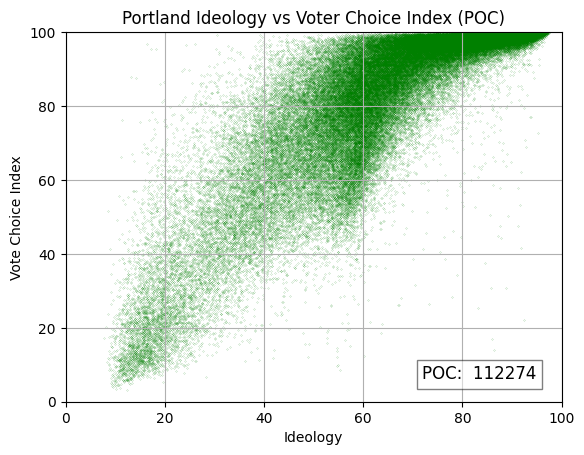

In [18]:
# Create three plots for each demographic
category_colors = {'WP': 'blue', 'WM': 'red', 'POC': 'green'}
total_rows = len(vf_df)
poc_percentage = len(vf_df[vf_df['Demo_Labels'] == 'POC']) / total_rows * 100
poc_city = len(vf_df[vf_df['Demo_Labels'] == 'POC'])

wm_percentage = len(vf_df[vf_df['Demo_Labels'] == 'WM']) / total_rows * 100
wm_city = len(vf_df[vf_df['Demo_Labels'] == 'WM'])

wp_percentage = len(vf_df[vf_df['Demo_Labels'] == 'WP']) / total_rows * 100
wp_city = len(vf_df[vf_df['Demo_Labels'] == 'WP'])

vals_city = {'POC': poc_city, 'WP': wp_city, 'WM': wm_city }
text = f"POC: {poc_city:.2f}\nWM: {wm_percentage:.2f}%\nWP: {wp_percentage:.2f}%"

for category, color in category_colors.items():
    plt.scatter(vf_df[vf_df['Demo_Labels'] == category]['Ideo22'],
                vf_df[vf_df['Demo_Labels'] == category]['VCI22'],
                color=color,
                label=category,
                s=0.01)

    plt.xlabel('Ideology')
    plt.ylabel('Vote Choice Index')
    plt.xlim(0, 100)
    plt.ylim(0, 100)
    title = 'Portland Ideology vs Voter Choice Index (' + category+')'
    plt.title(title)
    plt.text(0.95, 0.05, category + ":  " + str(vals_city[category]), fontsize=12, ha='right', va='bottom',transform=plt.gca().transAxes,
            bbox=dict(facecolor='white', alpha=0.5))
    plt.grid(True)
    plt.show()

Create overlay plots for each zone

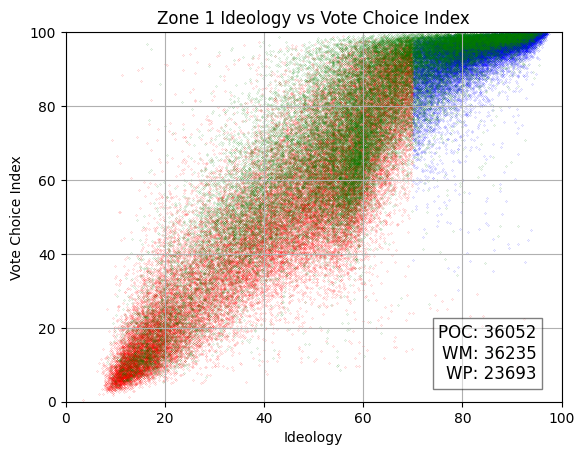

In [62]:
# Zone 1
zone_1 = vf_df[vf_df['zone'] == 0]
total_rows = len(zone_1)
poc_percentage = len(zone_1[zone_1['Demo_Labels'] == 'POC']) / total_rows * 100
poc_zone1 = len(zone_1[zone_1['Demo_Labels'] == 'POC'])

wm_percentage = len(zone_1[zone_1['Demo_Labels'] == 'WM']) / total_rows * 100
wm_zone1 = len(zone_1[zone_1['Demo_Labels'] == 'WM'])

wp_percentage = len(zone_1[zone_1['Demo_Labels'] == 'WP']) / total_rows * 100
wp_zone1 = len(zone_1[zone_1['Demo_Labels'] == 'WP'])

category_colors = {'WP': 'blue', 'WM': 'red', 'POC': 'green'}
text_zone1 = f"POC: {poc_zone1}\nWM: {wm_zone1}\nWP: {wp_zone1}"

for category, color in category_colors.items():
    plt.scatter(zone_1[zone_1['Demo_Labels'] == category]['Ideo22'],
                zone_1[zone_1['Demo_Labels'] == category]['VCI22'],
                color=color,
                label=category,
                s=0.01)

plt.xlabel('Ideology')
plt.ylabel('Vote Choice Index')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('Zone 1 Ideology vs Vote Choice Index')
plt.text(0.95, 0.05, text_zone1, fontsize=12, ha='right', va='bottom',transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True)
plt.show()

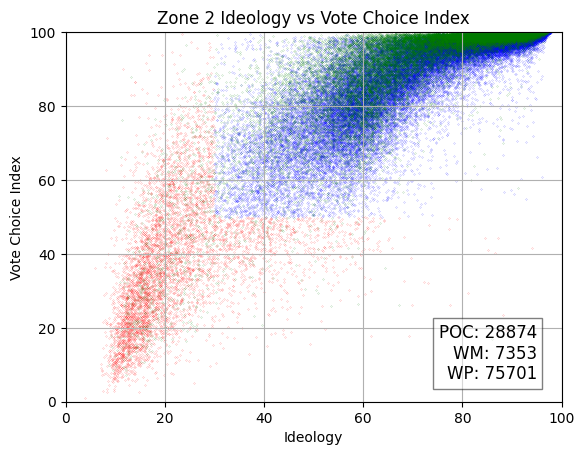

In [25]:
# Zone 2
zone_2 = vf_df[vf_df['zone'] == 1]
total_rows = len(zone_2)
poc_percentage = len(zone_2[zone_2['Demo_Labels'] == 'POC']) / total_rows * 100
poc_zone2 = len(zone_2[zone_2['Demo_Labels'] == 'POC'])

wm_percentage = len(zone_2[zone_2['Demo_Labels'] == 'WM']) / total_rows * 100
wm_zone2 = len(zone_2[zone_2['Demo_Labels'] == 'WM'])

wp_percentage = len(zone_2[zone_2['Demo_Labels'] == 'WP']) / total_rows * 100
wp_zone2 = len(zone_2[zone_2['Demo_Labels'] == 'WP'])

category_colors = {'WP': 'blue', 'WM': 'red', 'POC': 'green'}
text_zone2 = f"POC: {poc_zone2}\nWM: {wm_zone2}\nWP: {wp_zone2}"

for category, color in category_colors.items():
    plt.scatter(zone_2[zone_2['Demo_Labels'] == category]['Ideo22'],
                zone_2[zone_2['Demo_Labels'] == category]['VCI22'],
                color=color,
                label=category,
                s=0.01)

plt.xlabel('Ideology')
plt.ylabel('Vote Choice Index')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('Zone 2 Ideology vs Vote Choice Index')
plt.text(0.95, 0.05, text_zone2, fontsize=12, ha='right', va='bottom',transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True)
plt.show()

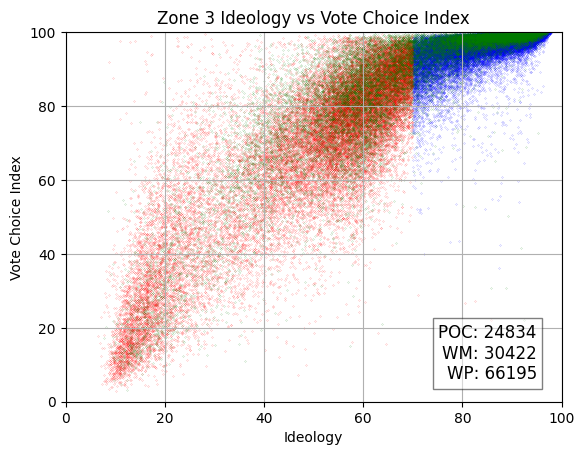

In [61]:
# Zone 3
zone_3 = vf_df[vf_df['zone'] == 2]
total_rows = len(zone_3)
poc_percentage = len(zone_3[zone_3['Demo_Labels'] == 'POC']) / total_rows * 100
poc_zone3 = len(zone_3[zone_3['Demo_Labels'] == 'POC'])

wm_percentage = len(zone_2[zone_2['Demo_Labels'] == 'WM']) / total_rows * 100
wm_zone3 = len(zone_3[zone_3['Demo_Labels'] == 'WM'])

wp_percentage = len(zone_3[zone_3['Demo_Labels'] == 'WP']) / total_rows * 100
wp_zone3 = len(zone_3[zone_3['Demo_Labels'] == 'WP'])

category_colors = {'WP': 'blue', 'WM': 'red', 'POC': 'green'}
text_zone3 = f"POC: {poc_zone3}\nWM: {wm_zone3}\nWP: {wp_zone3}"

for category, color in category_colors.items():
    plt.scatter(zone_3[zone_3['Demo_Labels'] == category]['Ideo22'],
                zone_3[zone_3['Demo_Labels'] == category]['VCI22'],
                color=color,
                label=category,
                s=0.01)

plt.xlabel('Ideology')
plt.ylabel('Vote Choice Index')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('Zone 3 Ideology vs Vote Choice Index')
plt.text(0.95, 0.05, text_zone3, fontsize=12, ha='right', va='bottom',transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True)
plt.show()

WP     78856
POC    20837
WM     11774
Name: Demo_Labels, dtype: int64


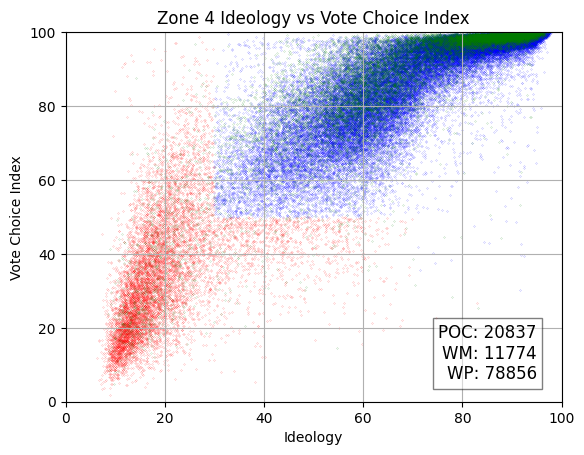

In [65]:
# Zone 4
zone_4 = vf_df[vf_df['zone'] == 3]
print(zone_4['Demo_Labels'].value_counts())
total_rows = len(zone_4)
poc_percentage = len(zone_4[zone_4['Demo_Labels'] == 'POC']) / total_rows * 100
poc_zone4 = len(zone_4[zone_4['Demo_Labels'] == 'POC'])

wm_percentage = len(zone_4[zone_4['Demo_Labels'] == 'WM']) / total_rows * 100
wm_zone4 = len(zone_4[zone_4['Demo_Labels'] == 'WM'])

wp_percentage = len(zone_4[zone_4['Demo_Labels'] == 'WP']) / total_rows * 100
wp_zone4 = len(zone_4[zone_4['Demo_Labels'] == 'WP'])

category_colors = {'WP': 'blue', 'WM': 'red', 'POC': 'green'}
text_zone4 = f"POC: {poc_zone4}\nWM: {wm_zone4}\nWP: {wp_zone4}"

for category, color in category_colors.items():
    plt.scatter(zone_4[zone_4['Demo_Labels'] == category]['Ideo22'],
                zone_4[zone_4['Demo_Labels'] == category]['VCI22'],
                color=color,
                label=category,
                s=0.01)

plt.xlabel('Ideology')
plt.ylabel('Vote Choice Index')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('Zone 4 Ideology vs Vote Choice Index')
plt.text(0.95, 0.05, text_zone4, fontsize=12, ha='right', va='bottom',transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True)
plt.show()

Create individual plots for each label for each zone

In [131]:
zone_1 = vf_df[vf_df['zone'] == 0]
num_z1 = len(zone_1)
poc_percentage_z1 = len(zone_1[zone_1['Demo_Labels'] == 'POC']) / num_z1 * 100
wm_percentage_z1 = len(zone_1[zone_1['Demo_Labels'] == 'WM']) / num_z1 * 100
wp_percentage_z1 = len(zone_1[zone_1['Demo_Labels'] == 'WP']) / num_z1 * 100
text_z1 = f"POC: {poc_percentage_z1:.2f}%\nWM: {wm_percentage_z1:.2f}%\nWP: {wp_percentage_z1:.2f}%"

zone_2 = vf_df[vf_df['zone'] == 1]
num_z2 = len(zone_2)
poc_percentage_z2 = len(zone_2[zone_2['Demo_Labels'] == 'POC']) / num_z2 * 100
wm_percentage_z2 = len(zone_2[zone_2['Demo_Labels'] == 'WM']) / num_z2 * 100
wp_percentage_z2 = len(zone_2[zone_2['Demo_Labels'] == 'WP']) / num_z2 * 100
text_z2 = f"POC: {poc_percentage_z2:.2f}%\nWM: {wm_percentage_z2:.2f}%\nWP: {wp_percentage_z2:.2f}%"

zone_3 = vf_df[vf_df['zone'] == 2]
num_z3 = len(zone_3)
poc_percentage_z3 = len(zone_3[zone_3['Demo_Labels'] == 'POC']) / num_z3 * 100
wm_percentage_z3 = len(zone_3[zone_3['Demo_Labels'] == 'WM']) / num_z3 * 100
wp_percentage_z3 = len(zone_3[zone_3['Demo_Labels'] == 'WP']) / num_z3 * 100
text_z3 = f"POC: {poc_percentage_z3:.2f}%\nWM: {wm_percentage_z3:.2f}%\nWP: {wp_percentage_z3:.2f}%"

zone_4 = vf_df[vf_df['zone'] == 3]
num_z4 = len(zone_4)
poc_percentage_z4 = len(zone_4[zone_4['Demo_Labels'] == 'POC']) / num_z4 * 100
wm_percentage_z4 = len(zone_4[zone_4['Demo_Labels'] == 'WM']) / num_z4 * 100
wp_percentage_z4 = len(zone_4[zone_4['Demo_Labels'] == 'WP']) / num_z4 * 100
text_z4 = f"POC: {poc_percentage_z4:.2f}%\nWM: {wm_percentage_z4:.2f}%\nWP: {wp_percentage_z4:.2f}%"


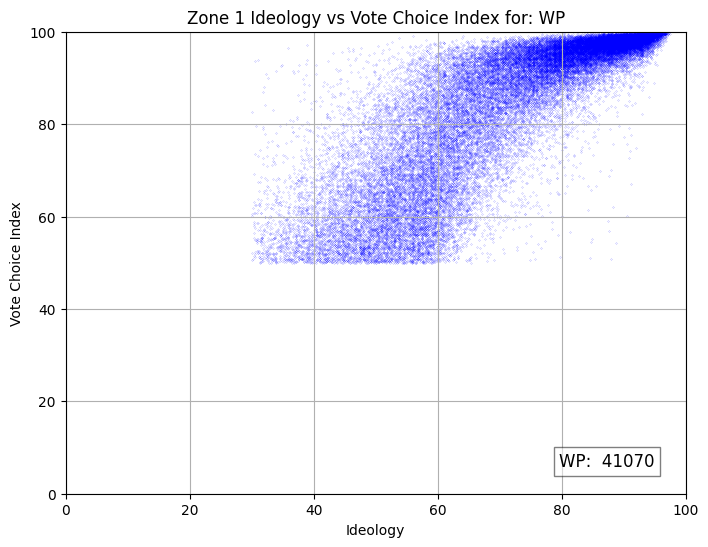

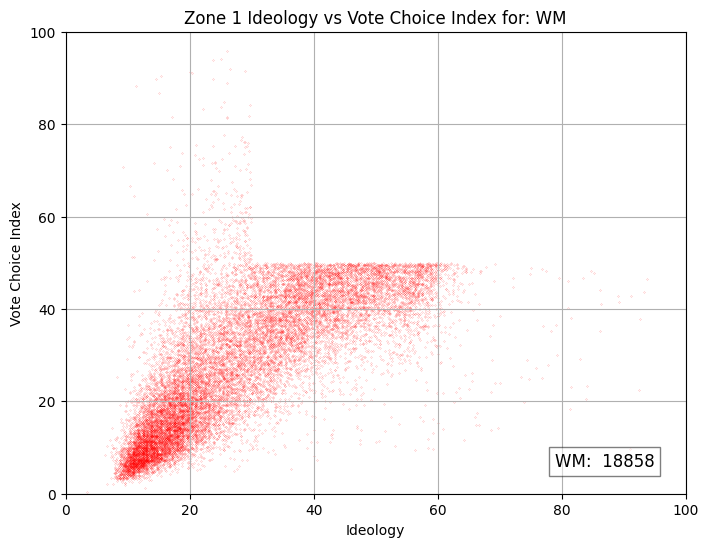

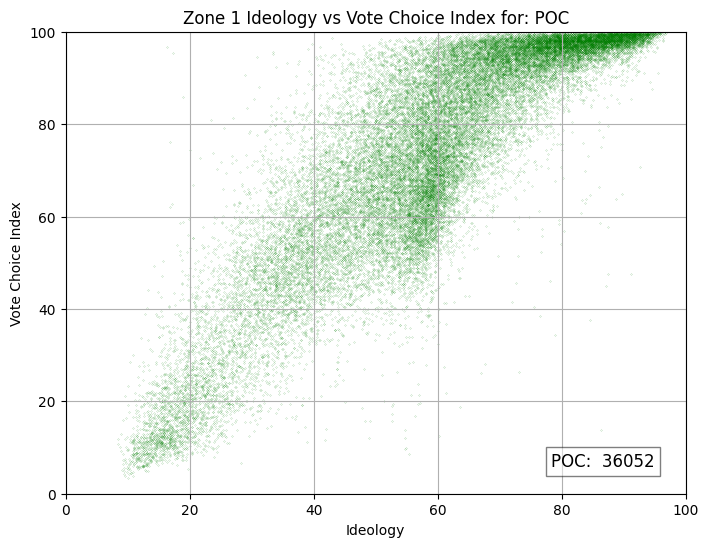

In [34]:
# Zone 1
zone_1 = vf_df[vf_df['zone'] == 0]
category_colors = {'WP': 'blue', 'WM': 'red', 'POC': 'green'}
vals_zone1 = {'POC': poc_zone1, 'WP': wp_zone1, 'WM': wm_zone1 }

for category, color in category_colors.items():
    # Filter the DataFrame for the current category
    filtered_df = zone_1[zone_1['Demo_Labels'] == category]

    # Create a scatterplot for the current category
    plt.figure(figsize=(8, 6))
    plt.scatter(filtered_df['Ideo22'], filtered_df['VCI22'], label=category, color=category_colors[category], s=0.01)
    plt.xlabel('Ideology')  # Replace with actual x-axis label
    plt.ylabel('Vote Choice Index')  # Replace with actual y-axis label
    plt.title(f'Zone 1 Ideology vs Vote Choice Index for: {category}')
    plt.xlim(0, 100)
    plt.ylim(0,100)
    plt.text(0.95, 0.05, category + ":  " + str(vals_zone1[category]), fontsize=12, ha='right', va='bottom',transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.5))
    plt.grid(True)
    plt.show()

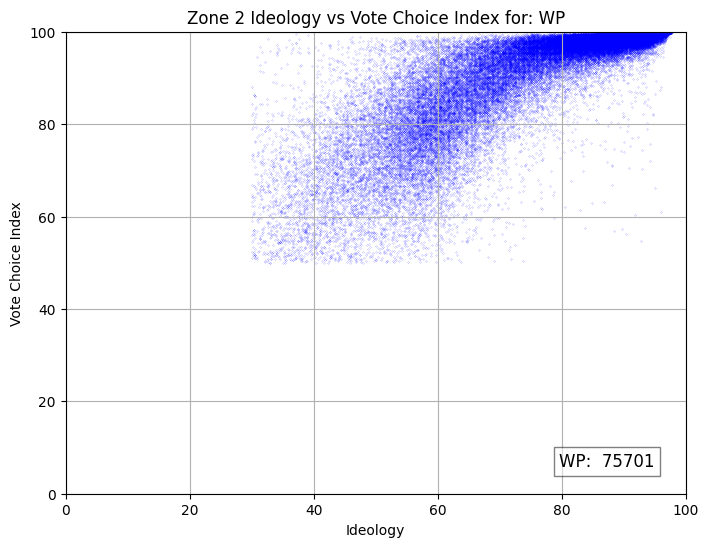

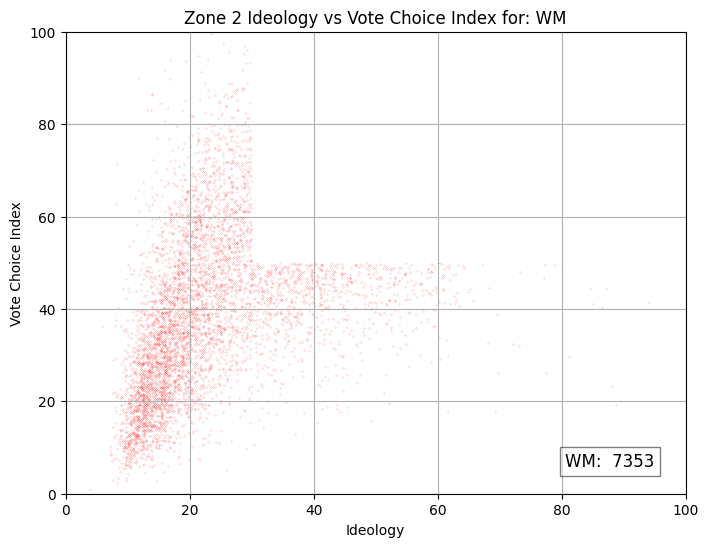

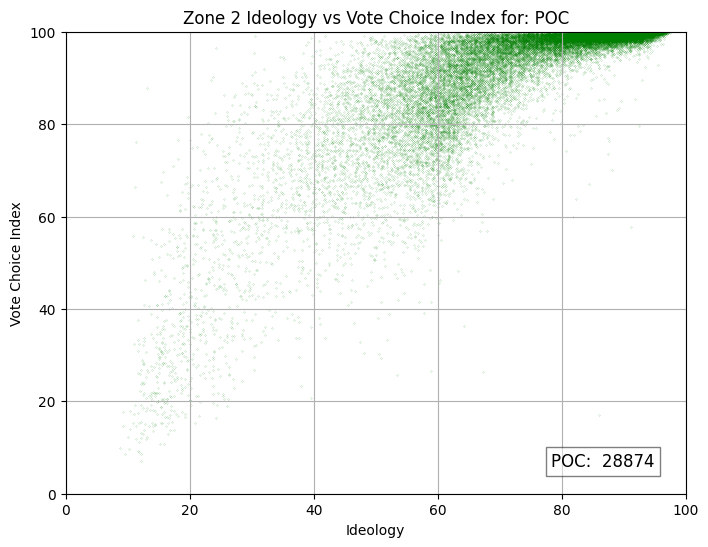

In [37]:
# Zone 2
zone_2 = vf_df[vf_df['zone'] == 1]
category_colors = {'WP': 'blue', 'WM': 'red', 'POC': 'green'}
vals_zone2 = {'POC': poc_zone2, 'WP': wp_zone2, 'WM': wm_zone2 }

for category, color in category_colors.items():
    # Filter the DataFrame for the current category
    filtered_df = zone_2[zone_2['Demo_Labels'] == category]

    # Create a scatterplot for the current category
    plt.figure(figsize=(8, 6))
    plt.scatter(filtered_df['Ideo22'], filtered_df['VCI22'], label=category, color=category_colors[category], s=0.01)
    plt.xlabel('Ideology')  # Replace with actual x-axis label
    plt.ylabel('Vote Choice Index')  # Replace with actual y-axis label
    plt.title(f'Zone 2 Ideology vs Vote Choice Index for: {category}')
    plt.xlim(0, 100)
    plt.ylim(0,100)
    plt.text(0.95, 0.05, category + ":  " + str(vals_zone2[category]), fontsize=12, ha='right', va='bottom',transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.5))
    plt.grid(True)
    plt.show()

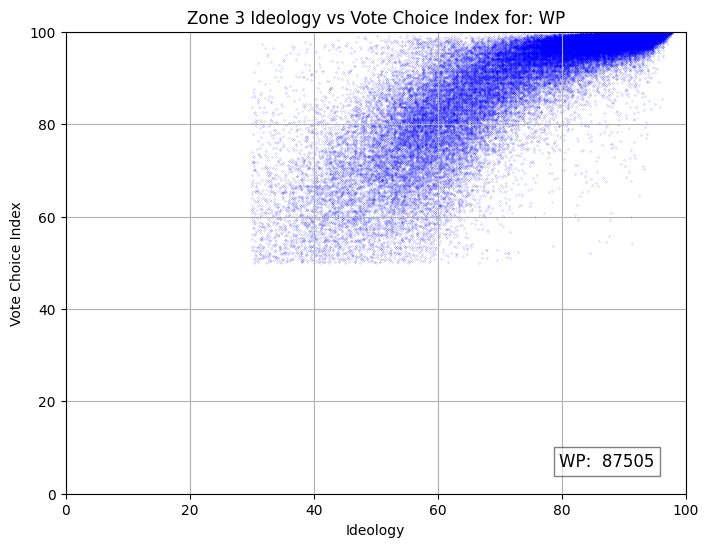

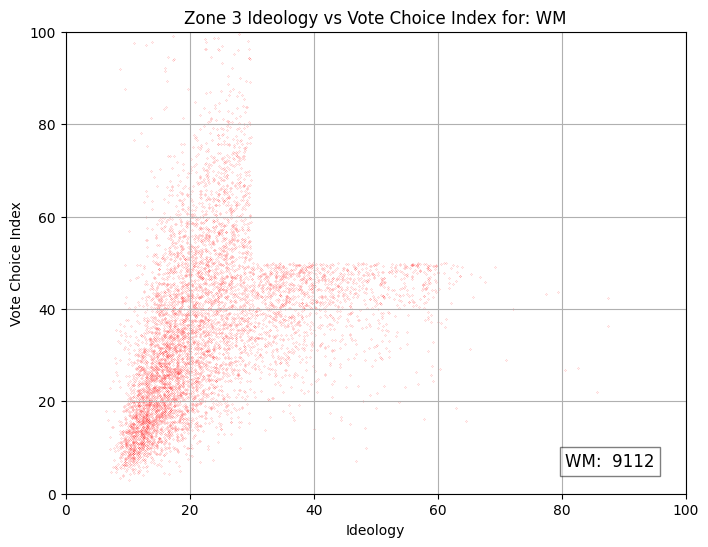

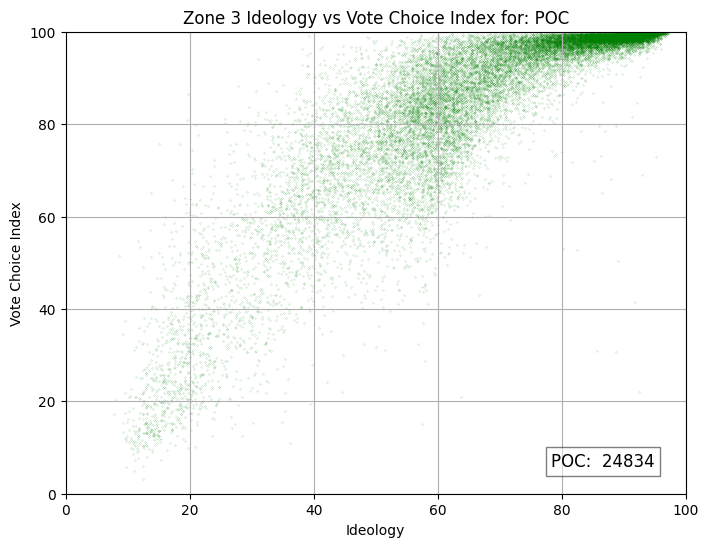

In [38]:
zone_3 = vf_df[vf_df['zone'] == 2]
category_colors = {'WP': 'blue', 'WM': 'red', 'POC': 'green'}
vals_zone3 = {'POC': poc_zone3, 'WP': wp_zone3, 'WM': wm_zone3 }

for category, color in category_colors.items():
    # Filter the DataFrame for the current category
    filtered_df = zone_3[zone_3['Demo_Labels'] == category]

    # Create a scatterplot for the current category
    plt.figure(figsize=(8, 6))
    plt.scatter(filtered_df['Ideo22'], filtered_df['VCI22'], label=category, color=category_colors[category], s=0.01)
    plt.xlabel('Ideology')  # Replace with actual x-axis label
    plt.ylabel('Vote Choice Index')  # Replace with actual y-axis label
    plt.title(f'Zone 3 Ideology vs Vote Choice Index for: {category}')
    plt.xlim(0, 100)
    plt.ylim(0,100)
    plt.text(0.95, 0.05, category + ":  " + str(vals_zone3[category]), fontsize=12, ha='right', va='bottom',transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.5))
    plt.grid(True)
    plt.show()

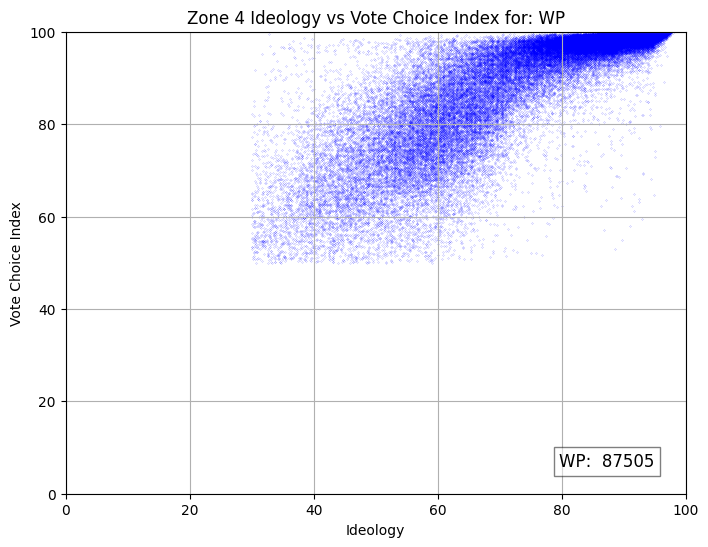

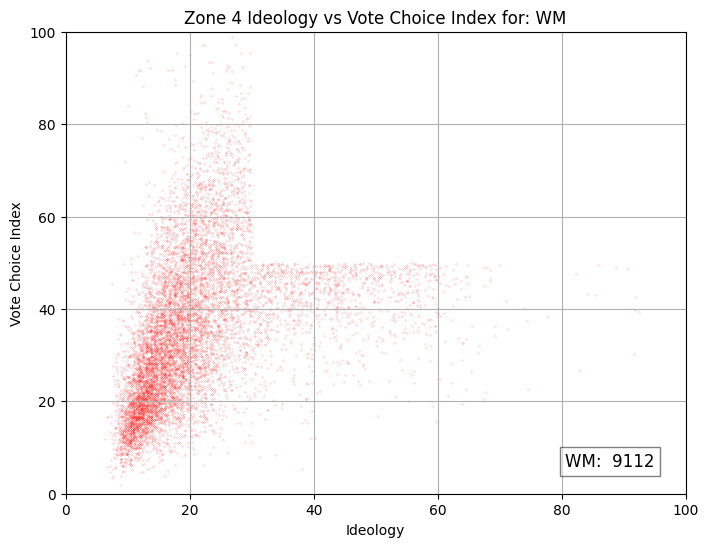

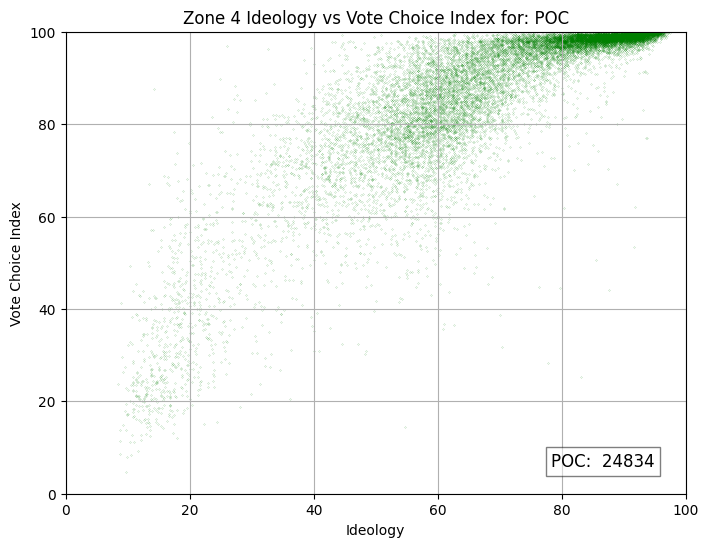

In [39]:
zone_4 = vf_df[vf_df['zone'] == 3]
category_colors = {'WP': 'blue', 'WM': 'red', 'POC': 'green'}
vals_zone4 = {'POC': poc_zone4, 'WP': wp_zone4, 'WM': wm_zone4 }

for category, color in category_colors.items():
    # Filter the DataFrame for the current category
    filtered_df = zone_4[zone_4['Demo_Labels'] == category]

    # Create a scatterplot for the current category
    plt.figure(figsize=(8, 6))
    plt.scatter(filtered_df['Ideo22'], filtered_df['VCI22'], label=category, color=category_colors[category], s=0.01)
    plt.xlabel('Ideology')  # Replace with actual x-axis label
    plt.ylabel('Vote Choice Index')  # Replace with actual y-axis label
    plt.title(f'Zone 4 Ideology vs Vote Choice Index for: {category}')
    plt.xlim(0, 100)
    plt.ylim(0,100)
    plt.text(0.95, 0.05, category + ":  " + str(vals_zone4[category]), fontsize=12, ha='right', va='bottom',transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.5))
    plt.grid(True)
    plt.show()